In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()


q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)



,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
query = 'select * from facts limit 5'
cursor.execute(query)
cursor.fetchall()


[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3),
 (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92),
 (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0),
 (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46)]

In [3]:
query = 'select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts'
cursor.execute(query)
cursor.fetchall()

[(0, 7256490011, 0.0, 4.02)]

In [4]:
query = 'select name from facts where population = 0'
cursor.execute(query)
cursor.fetchall()

[('Antarctica',)]

In [5]:
query = 'select name from facts where population = 7256490011'
cursor.execute(query)
cursor.fetchall()

[('World',)]

   population  population_growth  birth_rate   rate
0    32564342               2.32       38.57  13.89
1     3029278               0.30       12.92   6.58
2    39542166               1.84       23.67   4.31
3       85580               0.12        8.13   6.96
4    19625353               2.78       38.78  11.49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f646fab1198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f646f9315f8>]], dtype=object)

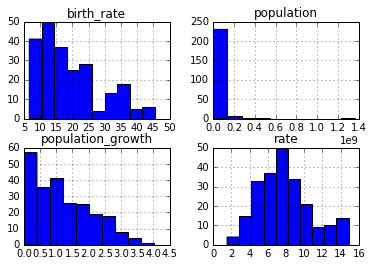

In [13]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

q = "select population, population_growth, birth_rate, death_rate rate from facts where population != 0 and population != 7256490011"
pop_data = pd.read_sql_query(q, conn)
print(pop_data.head())
pop_data.hist(layout = (2,2))


In [15]:
q = "select * from facts where population != 0 and population != 7256490011 limit 10"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


In [27]:
q = "select name, population/area from facts where population != 0 and population != 7256490011 and area !=0 order by population/area DESC"
pd.read_sql_query(q, conn)

,name,population/area
0,Macau,21168
1,Monaco,15267
2,Singapore,8141
3,Hong Kong,6445
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f646f2fe358>]], dtype=object)

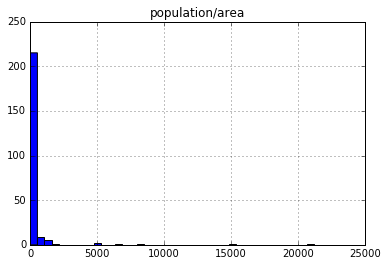

In [28]:
pop_density = pd.read_sql_query(q, conn)
pop_density.hist(bins = 40)

In [29]:
q = "select name, cast(area_water as float)/cast(area_land as float) from facts where population != 0 and population != 7256490011 order by cast(area_water as float)/cast(area_land as float) DESC"
pd.read_sql_query(q, conn)

,name,cast(area_water as float)/cast(area_land as float)
0,Virgin Islands,4.520231
1,Puerto Rico,0.554791
2,"Bahamas, The",0.386613
3,Guinea-Bissau,0.284673
4,Malawi,0.259396
5,Netherlands,0.225710
6,Uganda,0.222922
7,Eritrea,0.164356
8,Liberia,0.156240
9,Bangladesh,0.140509
